In [1]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import xarray as xr
import seaborn as sns
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PWD : /home/bouissob/Code


In [2]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position_driving = ['thermalDriving', 'halineDriving', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']

Var_X_BIG_Step2 = ['iceDraft','Big_T', 'Big_S', 'Distances_ground_line', 'Distances_front_line']
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
Var_X_BIG_Slope = ['iceDraft', 'bathymetry', 'Slope_iceDraft', 'Slope_bathymetry', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']
Var_X_slopexy = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'temperatureYZ', 'salinityYZ',
                  'Distances_ground_line', 'Distances_front_line']

OcTPlus = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst']
CPLs_test = ['CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

ALL_EXP = ['CPL_EXP10_rst','CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP13_rst','CPL_EXP20_rst','CPL_EXP21_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']
Train_oc_exp = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']


NEW = ['IceOcean1r_ElmerIce', 'IceOcean1ra_ElmerIce']
NEW_under100supr = ['IceOcean1r_ElmerIce_under100supr', 'IceOcean1ra_ElmerIce_under100supr']
NEW_fill100 = ['IceOcean1r_ElmerIce_fill100', 'IceOcean1ra_ElmerIce_fill100']
NEW_test = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP11_rst','CPL_EXP12_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

PWD : /home/bouissob/Code


<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

In [5]:
Bet_path = '/bettik/bouissob/'
p = f'{Bet_path}ISOMIP+/Ocean4_COM_NEMO-CNRS.nc'
data = xr.open_dataset(p)

In [6]:
data

<xarray.Dataset>
Dimensions:                    (nTime: 1200, ny: 40, nx: 240, nz: 144)
Dimensions without coordinates: nTime, ny, nx, nz
Data variables: (12/25)
    barotropicStreamfunction   (nTime, ny, nx) float32 ...
    salinityYZ                 (nTime, nz, ny) float32 ...
    temperatureYZ              (nTime, nz, ny) float32 ...
    salinityXZ                 (nTime, nz, nx) float32 ...
    temperatureXZ              (nTime, nz, nx) float32 ...
    bottomSalinity             (nTime, ny, nx) float32 ...
    ...                         ...
    time                       (nTime) object ...
    uBoundaryLayer             (nTime, ny, nx) float32 ...
    vBoundaryLayer             (nTime, ny, nx) float32 ...
    x                          (nx) float32 ...
    y                          (ny) float32 ...
    z                          (nz) float32 ...
Attributes: (12/19)
    experiment:                      ISOMIP+ COM_EXP4
    contact:                         nicolas.jourdain@univ-grenoble-alpes.fr
    institute:                       IGE-CNRS, Grenoble, France
    model:                           NEMO_3.6 (trunk r6402)
    repository:                      http://www.nemo-ocean.eu
    vertical_coordinates:            Z* (variable-volume levels with partial ...
    ...                              ...
    equation_of_state:               linear
    GammaT:                          0.026
    GammaS:                          0.000742857
    Cd:                              0.0025
    original_name:                   EXP4publi
    version:                         1.1 (bug on surface freshwater correctio...

PWD : /home/bouissob/Code
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653295473_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653048561_Ex_Long_training
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653295473_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653048561_Ex_Long_training


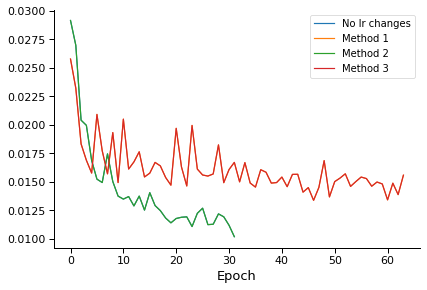

In [3]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

Mod = [{'Ocean' : OcT, 'Uniq_id' :  1653295473 }, {'Ocean' : OcT, 'Uniq_id' : 1653048561},
       {'Ocean' : OcT, 'Uniq_id': 1653295473}, {'Ocean' : OcT, 'Uniq_id' :  1653048561},
      ]#{'Ocean' : OcT, 'Uniq_id' : 1653041657}]
Plotting.Plot_Loss_against_loss(Mods = Mod, 
                    Desired_comparaison=['val_mse'], save = True,
                    label = ['No lr changes', 'Method 1', 'Method 2', 
                            'Method 3'])
#                label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau'])
#label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau']



In [5]:
p = Trainings.Get_model_path_json(Ocean = OcT, Uniq_id = 1647887298)[0]
mod = Computing_functions.Fetch_model(p + '/model_8.h5')

In [6]:
mod.weights

[<tf.Variable 'dense_6/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.813317  ],
        [0.06809237],
        [0.08035924]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.00383599], dtype=float32)>]

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653044112_Ex_Long_training
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1652989885_Ex_


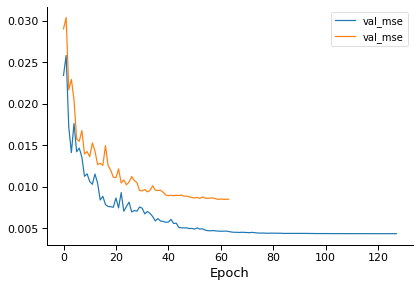

In [11]:
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1653044112},
      {'Ocean' : OcT, 'Uniq_id' : 1652989885}]
Plotting.Plot_Loss_against_loss(Mods = Mod, 
                    Desired_comparaison=['val_mse'], save = False)


In [4]:
Trainings.Get_model_path_json(Ocean = OcT, Batch_size = 128, Var = Var_X_BIG_Extra,
                              return_all = True, Scaling_lr = False, Epoch = 32)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1652956285_Ex_',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653383513_Ex_Comparemeth3-4',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653843515_Ex_Varxy',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653848238_Ex_Varxy',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653850597_Ex_Varxy',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653853433_Ex_Varxy']

Number of model used : 1
['Ocean1'] : [1.08055902] Gt/yr _96_96_Ch_0-1653843515_Ex_Varxy/model_29.h5                                                   

Number of model used : 1
['Ocean2'] : [0.95933041] Gt/yr _96_96_Ch_0-1653843515_Ex_Varxy/model_29.h5                                                   

Number of model used : 1
['Ocean3'] : [0.79104435] Gt/yr _96_96_Ch_0-1653843515_Ex_Varxy/model_29.h5                                                   

Number of model used : 1
['Ocean4'] : [0.53207449] Gt/yr _96_96_Ch_0-1653843515_Ex_Varxy/model_29.h5                                                   



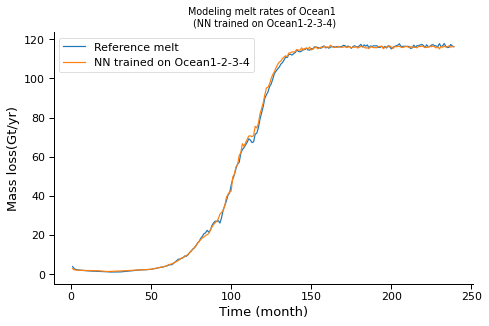

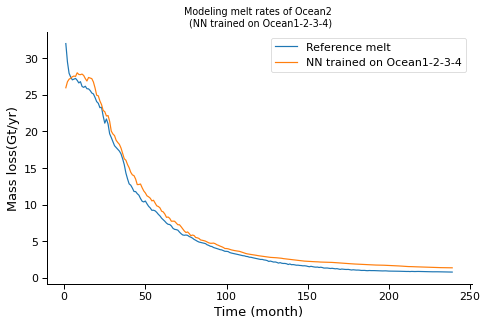

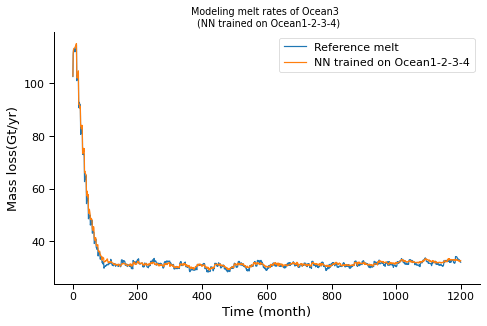

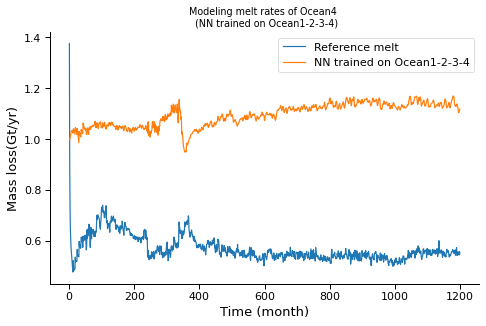

In [15]:
RMSE_ALL = []
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1652956285, 'Pick_Best' : True},
       {'Ocean' : OcT, 'Uniq_id' : 1653383513, 'Pick_Best' : False},
       {'Ocean' : OcT, 'Uniq_id' : 1653843515, 'Pick_Best' : True}
      ]
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod[2:], Save_name = '')
    RMSE_cur.append(RMSE)
RMSE_ALL.append(RMSE_cur)

In [31]:
Trainings.Get_model_path_json(Ocean = OcT, Neur = '32_32_96_96', 
                            Scaling_lr = True, Batch_size = 128,
                            return_all = True, Var = Var_X_BIG_Extra)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653041657_Ex_',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653652458_Ex_Scalinglrforbatch128',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653662065_Ex_Scalinglrforbatch128',
 '/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653672861_Ex_Scalinglrforbatch128']

PWD : /home/bouissob/Code
Number of model used : 1
 RMSE : 0.007747951260589368 mm2_96_96_Ch_0-1653665120_Ex_Var/model_10.h5                                                   
['Ocean1'] : [1.00343577] Gt/yr 

Number of model used : 1
 RMSE : 0.03264224799205177 mm32_96_96_Ch_0-1653665120_Ex_Var/model_10.h5                                                   
['Ocean2'] : [1.17590422] Gt/yr 

Number of model used : 1
 RMSE : 0.09914138790935147 mm32_96_96_Ch_0-1653665120_Ex_Var/model_10.h5                                                   
['Ocean3'] : [1.13814168] Gt/yr 

Number of model used : 1
 RMSE : 0.029230100755202354 mm2_96_96_Ch_0-1653665120_Ex_Var/model_10.h5                                                   
['Ocean4'] : [0.19084957] Gt/yr 



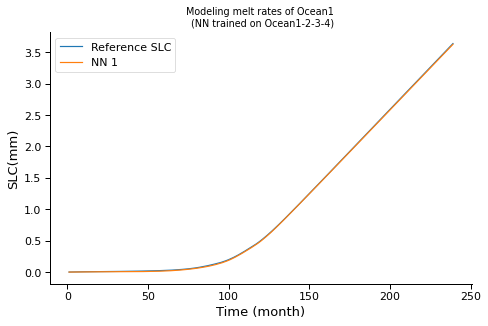

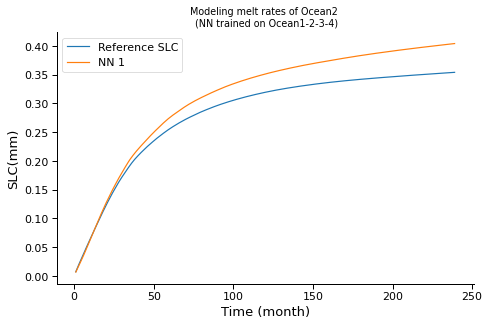

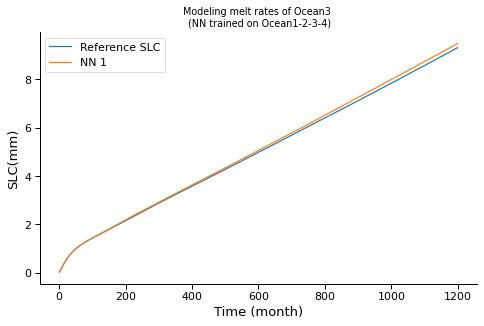

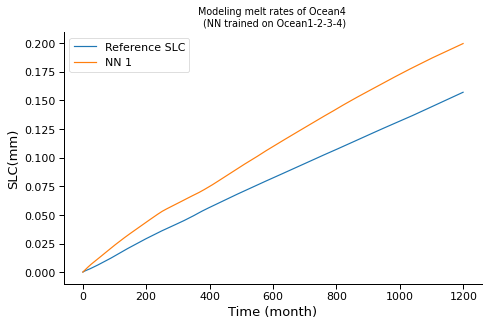

In [14]:
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1653665120, 'Pick_Best' : True}, #32-64-32 Ep8 Tyz, Syz, iceD
      ]
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Labels = ['NN 1', 'NN 2', 'NN 3','NN 4'], SLC = True)
    RMSE_cur.append(RMSE)


Number of model used : 1


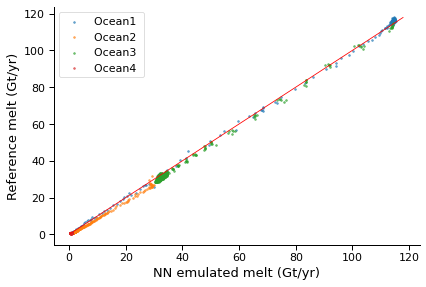

1.089696284996034
Number of model used : 1


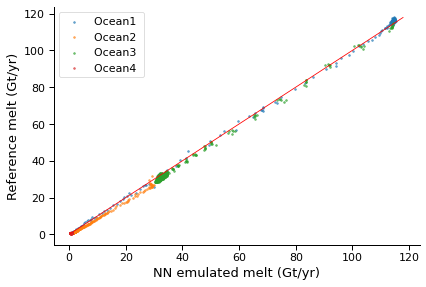

1.089696284996034


In [25]:
Mods = [{'Ocean' : OcT, 'Uniq_id' : 1652956285, 'Pick_Best' : True}, 
        {'Ocean' : OcT, 'Uniq_id' : 1652956285, 'Pick_Best' : True}]
for m in Mods:
    RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = m, Display_label = False, Display_title = False)

In [13]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Mod = [{'Ocean' : OcT, 'Uniq_id' :  1653048561 }, {'Ocean' : OcT, 'UniDesired_length=' : 1653053178},
       {'Ocean' : OcT, 'Uniq_id':  1653053726}, {'Ocean' : OcT, 'Uniq_id' : 1652989885}]
Plotting.Plot_Loss_against_loss(Mods = Mod, Desired_comparaison=['val_mse'], save = True,
                                label = ['No lr changes', 'Method 1', 'Method 2', 'Method 3'])
#                label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau'])
#label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau']

'/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1651148926_Ex_'

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1652951334_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653492297_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653533047_Ex_BenchVariableInsert
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653405579_Ex_


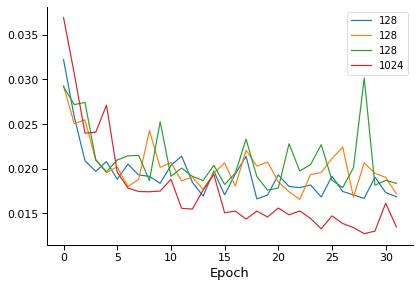

In [9]:
Mod = [{'Ocean' : OcT, 'Uniq_id' :  1652951334 }, {'Ocean' : OcT, 'Uniq_id' : 1653492297},
       {'Ocean' : OcT, 'Uniq_id':  1653533047}, {'Ocean' : OcT, 'Uniq_id' : 1653405579},
      ]#{'Ocean' : OcT, 'Uniq_id' : 1653041657}]
Plotting.Plot_Loss_against_loss(Mods = Mod, Desired_comparaison=['val_mse'], save = False, Desired_length=64,
                                label = ['128', '128', '128', '1024'])
#                label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau'])
#label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau']

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_32_N_32_32_96_96_Ch_0-1653533047_Ex_BenchVariableInsert
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1652949724_Ex_


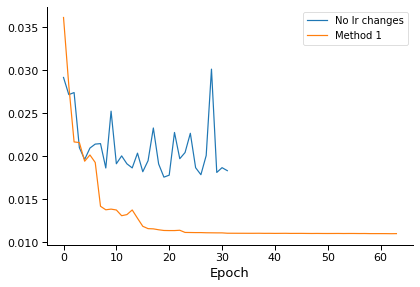

In [26]:
Mod = [{'Ocean' : OcT, 'Uniq_id' :  1653533047 }, {'Ocean' : OcT, 'Uniq_id' : 1652949724, 'Batch_size' : 128}]
Plotting.Plot_Loss_against_loss(Mods = Mod, Desired_comparaison=['val_mse'], save = True,
                                label = ['No lr changes', 'Method 1'])
#                label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau'])
#label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau']

Ep_32_N_32_32_96_96_Ch_0-1653533047_Ex_BenchVariableInsert


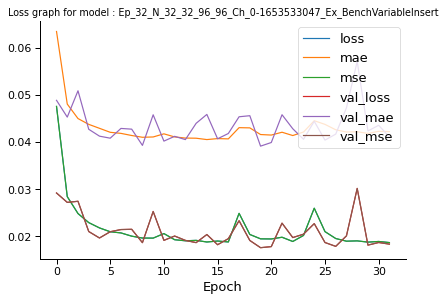

In [5]:
d = Plotting.Plot_loss_model(Ocean = OcT, Uniq_id = 1653533047)

PWD : /home/bouissob/Code
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653044112_Ex_Long_training
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_128_N_128_128_128_128_128_Ch_0-1653216203_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_128_N_128_128_128_128_128_Ch_0-1653216190_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst_CPL_EXP13_rst_CPL_EXP22_rst_CPL_EXP23_rst/Ep_256_N_128_128_128_128_128_128_Ch_0-1650550616_Ex_


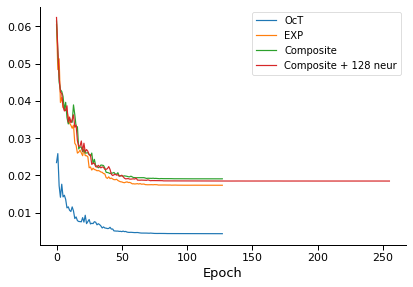

In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Mod = [{'Ocean' : OcT, 'Uniq_id' :  1653044112 }, {'Ocean' : CPLs_test, 'Uniq_id' : 1653216203},
       {'Ocean' : Train_oc_exp, 'Uniq_id' : 1653216190}, {'Ocean' : Train_oc_exp, 'Uniq_id' : 1650550616}]
       
Plotting.Plot_Loss_against_loss(Mods = Mod, Desired_comparaison=['val_mse'], save = False,
                                label = ['OcT','EXP', 'Composite', 'Composite + 128 neur' ])
#                label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau'])
#label = ['No lr changes', 'Lr /5 every 8', 'Lr /2 every 10', 'lr plateau']


PWD : /home/bouissob/Code
Number of model used : 1
 RMSE : 0.028506127376183726 mm_32_Ch_0-1652797706_Ex_                                                   
Number of model used : 1
 RMSE : 0.009649152130165796 mm2_96_96_Ch_0-1653048561_Ex_Long_training                                                   
Number of model used : 1
 RMSE : 0.0032123265074007375 mm_96_96_Ch_0-1652989885_Ex_                                                   
Number of model used : 1
 RMSE : 0.0018427244356362957 mm128_128_128_128_Ch_0-1653044112_Ex_Long_training                                                   
['Ocean1'] : [0.53564013] Gt/yr 

Number of model used : 1
 RMSE : 0.019116984394973505 mm_32_Ch_0-1652797706_Ex_                                                   
Number of model used : 1
 RMSE : 0.005447709679451138 mm2_96_96_Ch_0-1653048561_Ex_Long_training                                                   
Number of model used : 1
 RMSE : 0.001001837332289676 mm2_96_96_Ch_0-1652989885_Ex_       

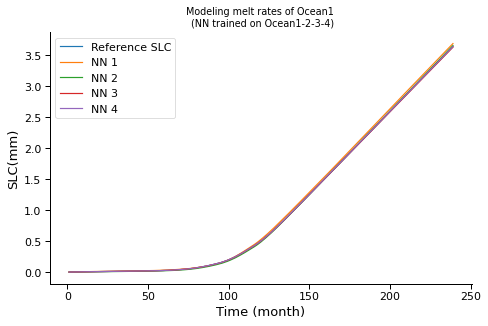

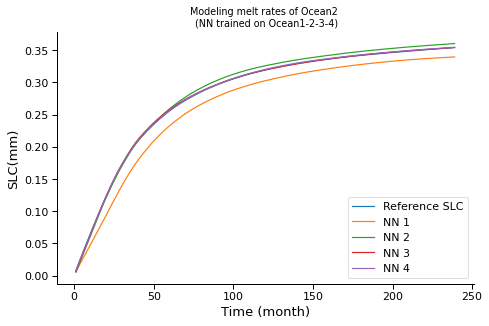

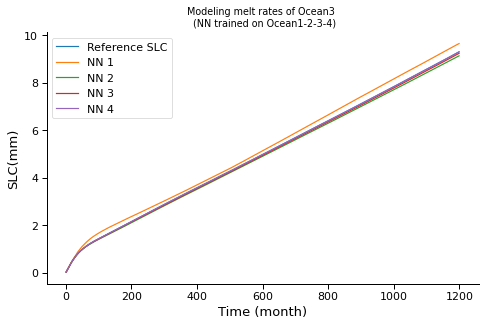

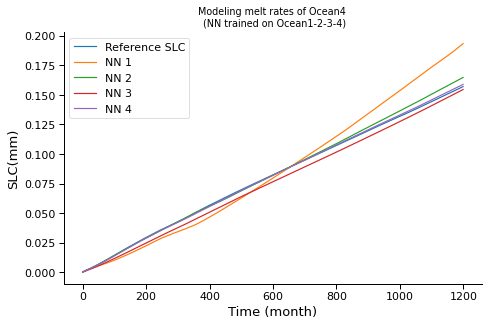

In [33]:
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1652797706}, #32-64-32 Ep8 Tyz, Syz, iceD
       {'Ocean' : OcT, 'Uniq_id' : 1653048561}, #32-32-96-96 Ep64 no lr 
       {'Ocean' : OcT, 'Uniq_id' : 1652989885}, #32-32-96-96 Ep64 Plateau lr
       {'Ocean' : OcT, 'Uniq_id' : 1653044112} #Best Neur = 128X5 Ep128 Plateau lr
      ]
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Labels = ['NN 1', 'NN 2', 'NN 3','NN 4'], SLC = True)
    RMSE_cur.append(RMSE)


Ep_128_N_128_128_128_128_128_Ch_0-1653044444_Ex_Long_training


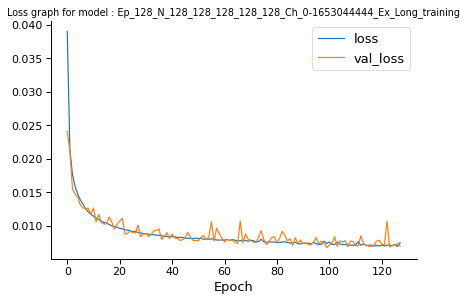

In [31]:
m = {'Ocean' : Train_oc_exp, 'Uniq_id' : 1650550616}
d = Plotting.Plot_loss_model(Ocean = OcT, Var = Var_X_BIG_Extra ,index = 4 , Scaling_lr = False,
                            Forbid_key=['mae', 'val_mae', 'mse', 'val_mse'])
min(d)

Number of model used : 1
['CPL_EXP10_rst'] : [24.51767404] Gt/yr 128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP11_rst'] : [2.11396572] Gt/yr _128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [0.80777691] Gt/yr _128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP13_rst'] : [21.95924775] Gt/yr 128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP20_rst'] : [3.1801219] Gt/yr 8_128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP21_rst'] : [2.94507932] Gt/yr _128_128_Ch_0-1653307943_Ex_                                                   

Number of model used : 1
['CPL_EXP22_rst'] : [0.18019921] Gt/yr _128_128_Ch_0-1653307943_Ex_                                      

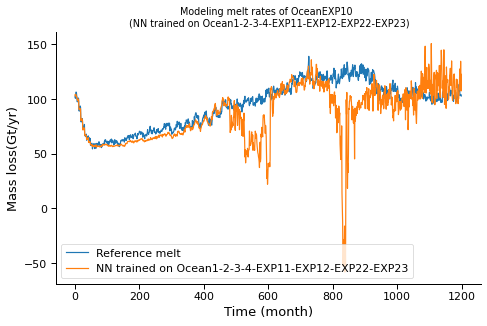

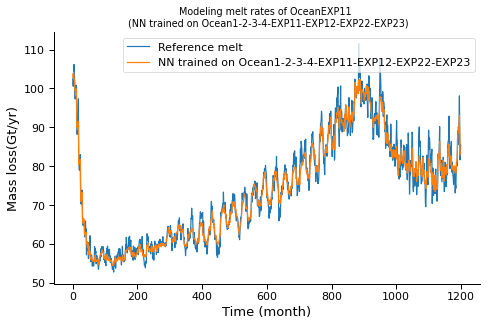

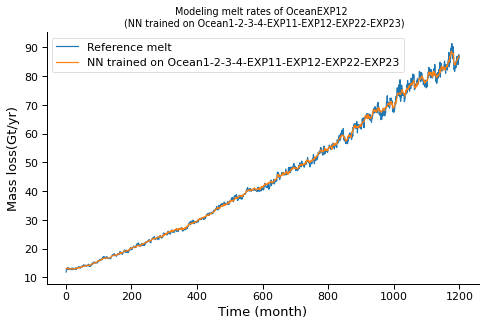

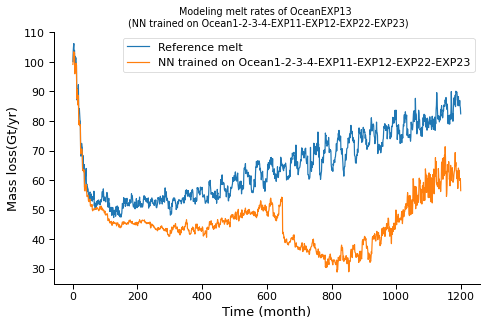

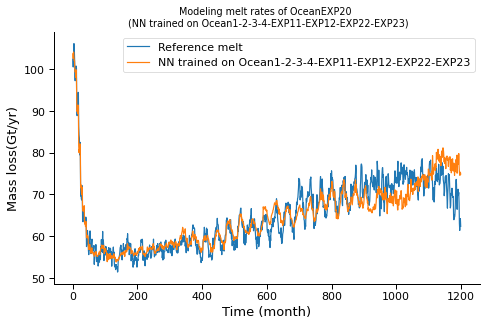

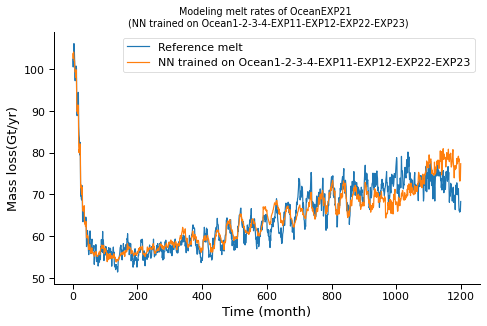

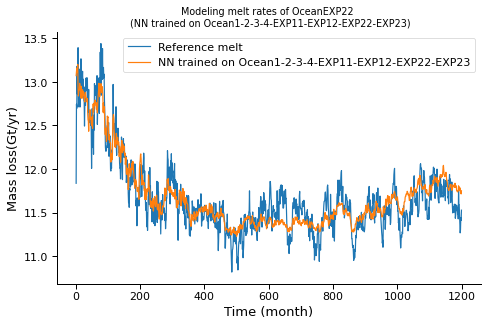

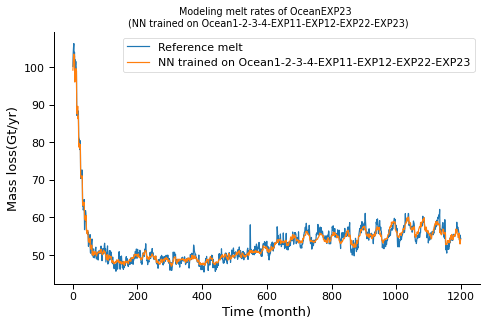

In [4]:
RMSE_ALL = []
ALL_Ocean = ALL_EXP + OcT
Mod = [{'Ocean' : NEW_test, 'Uniq_id' : 1653307943}## Only OceanT
      ]
for m in Mod:
    RMSE_cur = []
    for OC_target in ALL_EXP:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_cur.append(RMSE)
    print(RMSE_cur)
    RMSE_ALL.append(RMSE_cur)

In [4]:
ALL_Ocean = ALL_EXP + OcT
CPLs_test

['CPL_EXP10_rst', 'CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

Number of model used : 1
['CPL_EXP10_rst'] : [30.48438309] Gt/yr 128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP11_rst'] : [2.03982052] Gt/yr _128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [0.80347044] Gt/yr _128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP13_rst'] : [26.50789029] Gt/yr 128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP20_rst'] : [3.1483405] Gt/yr 8_128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP21_rst'] : [2.91709164] Gt/yr _128_128_Ch_0-1653306283_Ex_                                                   

Number of model used : 1
['CPL_EXP22_rst'] : [0.16835942] Gt/yr _128_128_Ch_0-1653306283_Ex_                                      

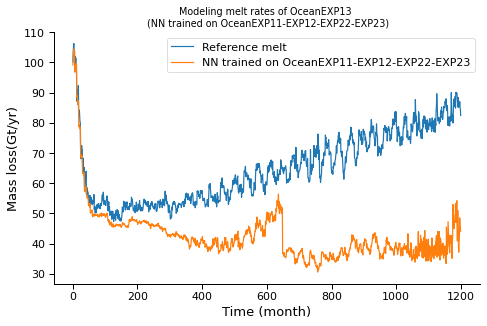

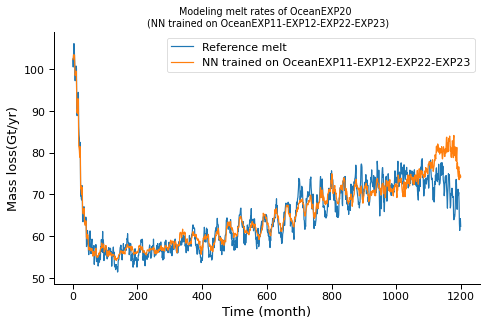

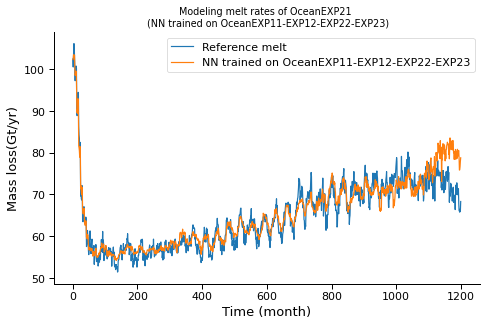

In [3]:
RMSE_ALL = []
CPLs_2 = ['CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']
ALL_Ocean = ALL_EXP + OcT
Mod = [{'Ocean' : CPLs_2, 'Uniq_id' : 1653306283}## Only OceanT
      ]
for m in Mod:
    RMSE_cur = []
    for OC_target in ALL_EXP:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_cur.append(RMSE)
    print(RMSE_cur)
    RMSE_ALL.append(RMSE_cur)

Number of model used : 1
['CPL_EXP10_rst'] : [2.23429178] Gt/yr _128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP11_rst'] : [17.68172384] Gt/yr 128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [5.11348577] Gt/yr _128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP13_rst'] : [1.58411621] Gt/yr _128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP20_rst'] : [5.06531834] Gt/yr _128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP21_rst'] : [4.9283171] Gt/yr 8_128_128_Ch_0-1653216203_Ex_                                                   

Number of model used : 1
['CPL_EXP22_rst'] : [0.21494444] Gt/yr _128_128_Ch_0-1653216203_Ex_                                      

/home/bouissob/Code/Scripts/Plotting.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


['Ocean1'] : [0.83325159] Gt/yr 

Number of model used : 1
['Ocean2'] : [0.61116598] Gt/yr 128_128_128_128_Ch_0-1653216190_Ex_                                                   

Number of model used : 1
['Ocean3'] : [0.59610261] Gt/yr 128_128_128_128_Ch_0-1653216190_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.06704734] Gt/yr 128_128_128_128_Ch_0-1653216190_Ex_                                                   

[[array([2.39175262])], [array([14.75739229])], [array([8.44191707])], [array([1.71196829])], [array([3.95172187])], [array([4.19208575])], [array([0.21977527])], [array([1.20229543])], [array([0.83325159])], [array([0.61116598])], [array([0.59610261])], [array([0.06704734])]]


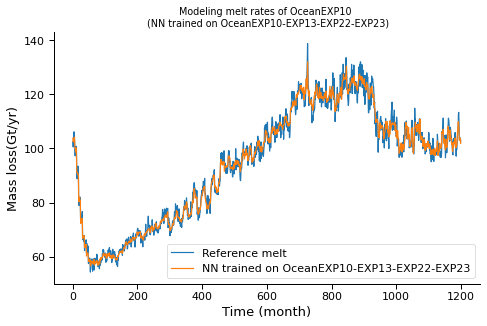

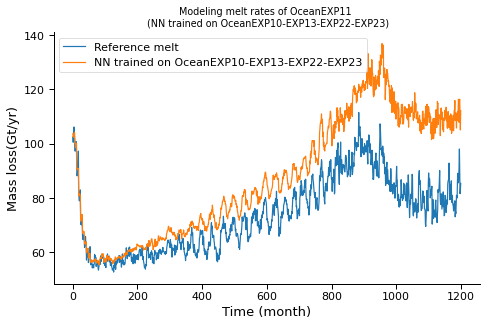

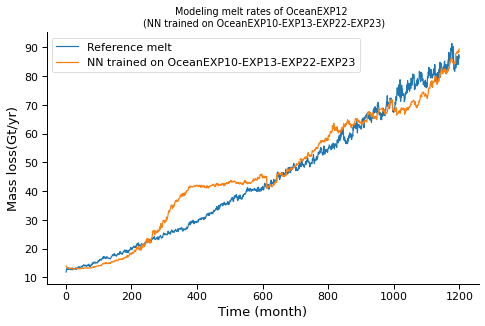

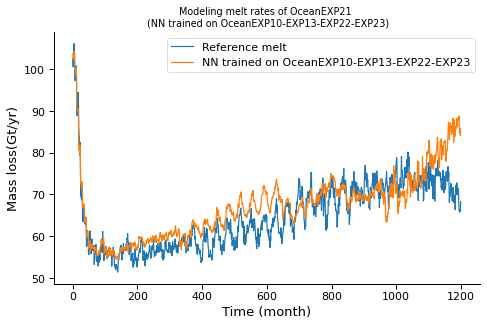

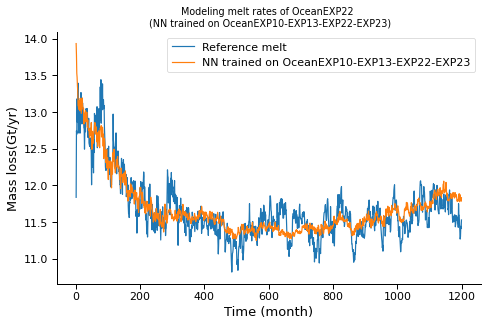

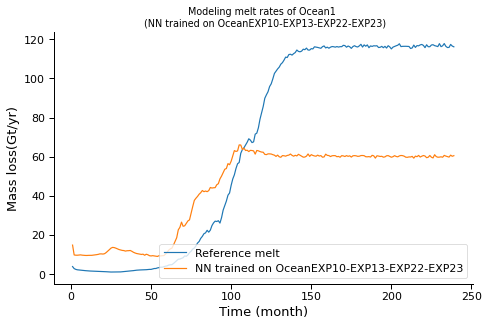

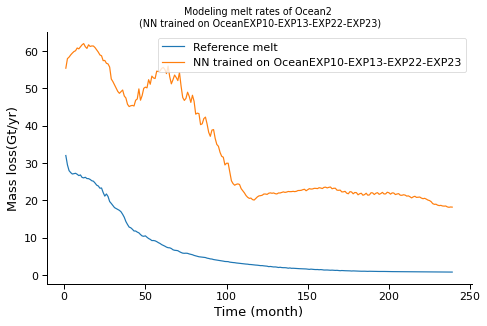

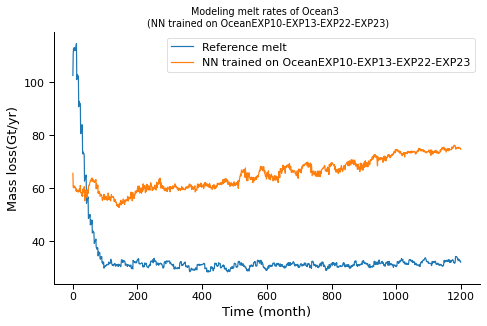

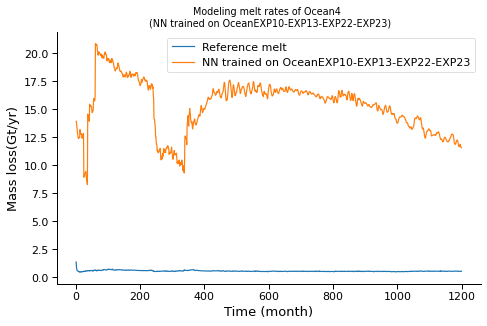

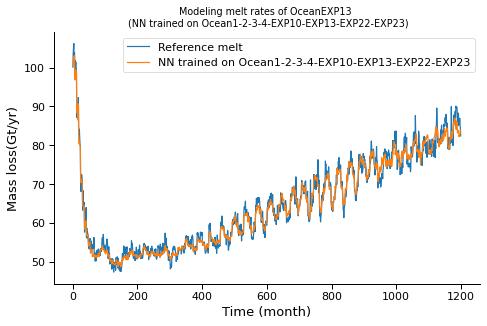

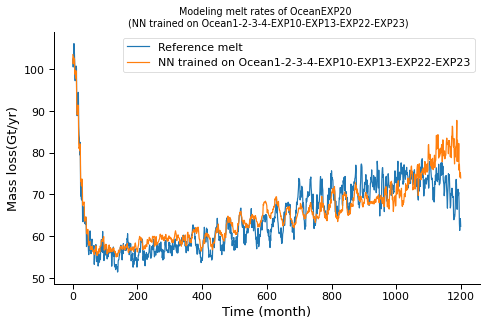

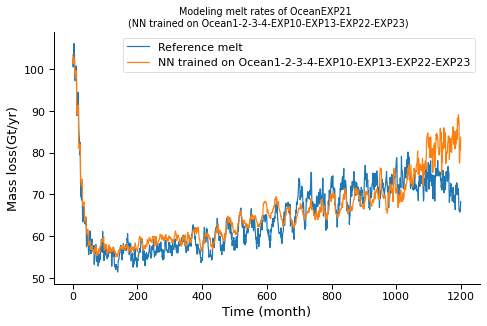

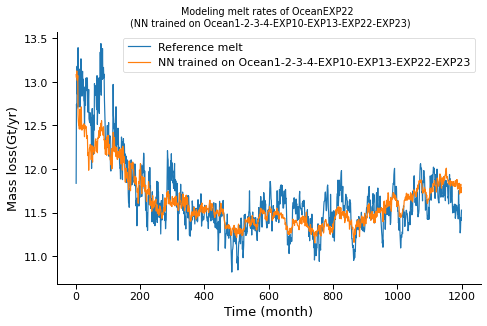

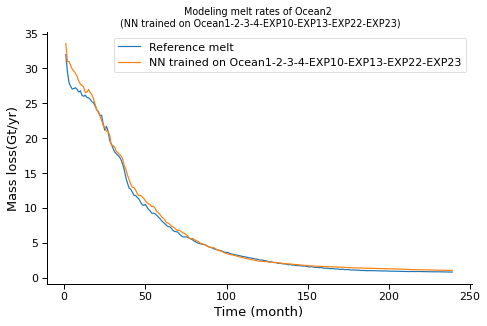

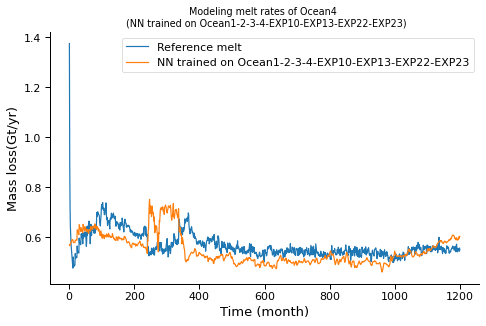

In [ ]:
RMSE_ALL = []
New_oc = [['Ocean1', 'Ocean2'], ['Ocean3', 'Ocean4']]
New_oc = [OcT]
ALL_Ocean = ALL_EXP + OcT
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1653044112},## Only OceanT
       {'Ocean' : OcTPlus, 'Uniq_id' : 1653219162},## Recalibration Oc + EXP10
       {'Ocean' : CPLs_test, 'Uniq_id' : 1653216203},## Composite only EXP
       {'Ocean' : Train_oc_exp, 'Uniq_id' : 1653216190}, ## Composite trained Oc + EXP
      ]
for m in Mod[2:]:
    RMSE_cur = []
    for OC_target in ALL_Ocean:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_cur.append(RMSE)
    print(RMSE_cur)
    RMSE_ALL.append(RMSE_cur)

Number of model used : 1


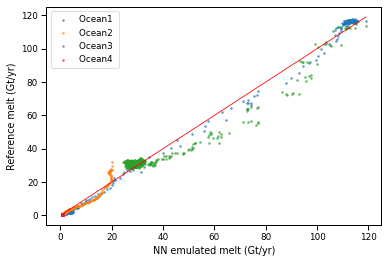

2.7232132711579546


In [54]:
Mod = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = Mod, Display_label = False, Display_title = False)

Number of model used : 1


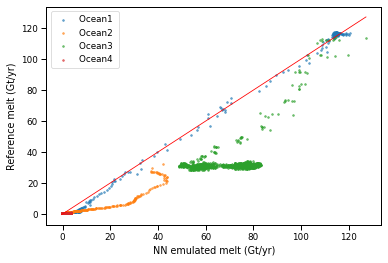

25.414425108421963


In [55]:
Mod = {'Ocean' : 'Ocean1', 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = Mod, Display_label = False, Display_title = False)

In [ ]:
Mod = [{'Ocean' : 'Ocean1', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean2', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean3', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean4', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean1_Ocean2', 'Method_data' : 3, 'Neur' : '32_64_32'},
       {'Ocean' : 'Ocean3_Ocean4', 'Method_data' : 3, 'Neur' : '32_64_32'}
      ]
RMSE_cur = []
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '')
    RMSE_cur.append(RMSE)
RMSE_ALL.append(RMSE_cur)

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

Compute_at_ind = True
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1653044112}]
RMSE_cur = []
RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, 
            Ocean_target = OcT, Type_tar = 'COM_NEMO-CNRS', 
            NN_attributes = Mod, Save_name = '', Compute_at_ind = False)
RMSE_cur.append(RMSE)


PWD : /home/bouissob/Code
Number of model used : 1


Number of model used : 1
['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1653044112_Ex_Long_training']


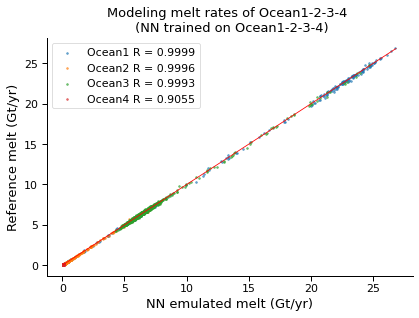

0.07092545115439614
[0.12206789 0.04717696 0.0927159  0.00749901]


In [8]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False,
                            message = 0, Ocean_target = OcT, NN_attributes = Mod[0], 
                            Compute_at_ind = True)
print(RMSEs)

In [9]:
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = False,
                            message = 0, Ocean_target = OcT, NN_attributes = Mod[0], 
                            Compute_at_ind = False)
print(RMSEs)

Number of model used : 1


0.29194455934095875
[0.53564013 0.1859132  0.37300224 0.03508808]


In [ ]:
Model_id = 1646995963
Exp = []
Mod = {'Ocean' : OcT, 'Uniq_id' : Model_id}
for OC_target in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', 
            Titles = ['T(z) S(z) iceD', '+Distgl-fl', '+slopenorm','slopexy' ])
    RMSE_cur.append(RMSE)

In [ ]:
_ = Plotting.plot_N_side_exp(Trainings.model_NN, Mod, ind = 0, T = [0], Oc_tar = 'Ocean4', save = True, Title = Title,
                            One_profile = True, sharing='row')

In [ ]:
#Dataset[['meltRate', 'Mod_melt']]

In [ ]:
RMSEs = []
Model_id = 1653033955 # No lr changes Batchsize 1024

for oc in ALL_EXP:
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Uniq_id' : Model_id}, Save_name = '')[0]
    RMSEs.append(RMSE)

Number of model used : 1
['CPL_EXP10_rst'] : [66.14421955] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1
['CPL_EXP11_rst'] : [43.26389378] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1
['CPL_EXP12_rst'] : [25.88802008] Gt/yr h_0-1653033955_Ex_                                                   

Number of model used : 1


Ep_32_N_32_32_96_96_Ch_0-1652956285_Ex_


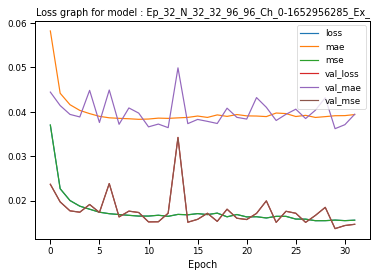

In [67]:
A = Plotting.Plot_loss_model(Ocean = OcT, Neur = '32_32_96_96', Epoch = 32, 
                    Scaling_lr = False, return_all = True, Var = Var_X_BIG_Extra)

Number of model used : 1
['Ocean1'] : [3.38231562] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean2'] : [2.20655819] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean3'] : [3.01311614] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean4'] : [0.29885285] Gt/yr 96_96_Ch_0-1648637104_Ex_Same_ind                                                   

Number of model used : 1
['Ocean1'] : [1.74855401] Gt/yr 96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                                                   

Number of model used : 1
['Ocean2'] : [1.59972657] Gt/yr 96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                                                   

Number of model used : 1
['Ocean3'] : [1.5208159] Gt/yr _96_96_Ch_0-1648211452_Ex_ALL_T_S_initial                               

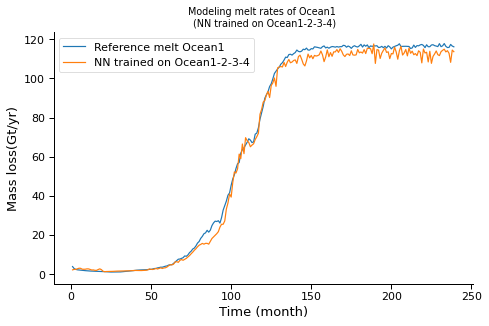

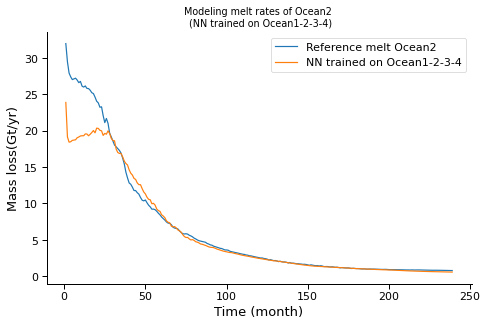

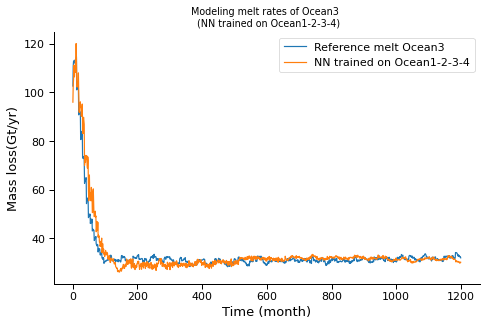

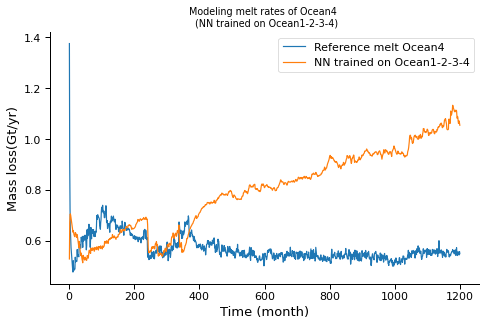

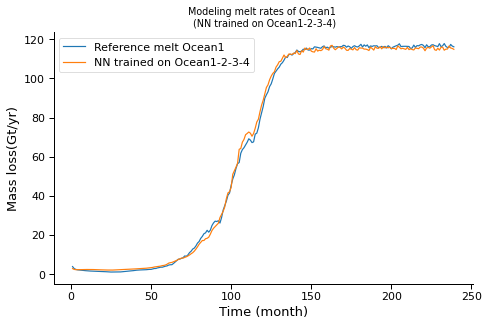

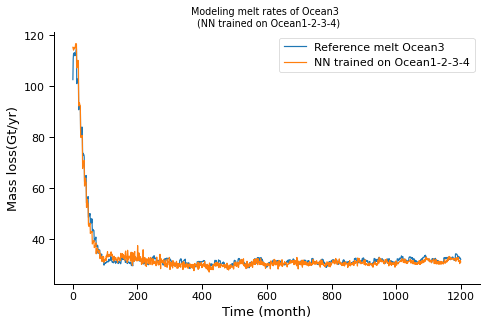

In [26]:
RMSE_ALL = []
Mod = [{'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_32_96_96', 
        'index' : 0,  'Var' : Var_X_non_position}, 
       {'Ocean' : OcT, 'Method_data' : 4, 'Neur' : '32_32_96_96', 
        'index' : 0,  'Var' : Var_X_BIG_test}
      ]

for m in Mod:
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_ALL.append(RMSE)


In [24]:
m = {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_32_96_96', 'Var' : Var_X_non_position}
p = Trainings.Get_model_path_json(**m)
data = Trainings.Get_model_attributes(p[0])

In [25]:
p

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind']

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_8_N_32_64_64_32_Ch_0-1652791205_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_8_N_32_64_64_32_Ch_0-1652791205_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_8_N_32_64_64_32_Ch_0-1652791510_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_8_N_32_64_64_32_Ch_0-1652791510_Ex_


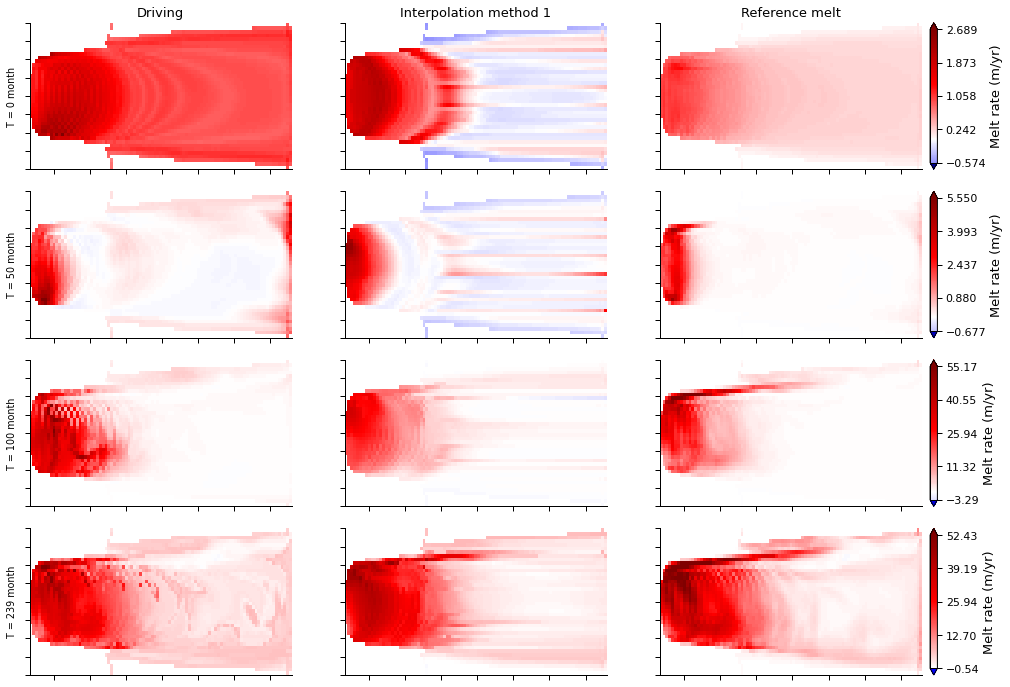

In [5]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4']

Mods = [{'Epoch' : 8, 'Neur' : '32_64_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position_driving},
        {'Epoch' : 8, 'Neur' : '32_64_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

#Mods = [{'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position_driving}]
Titles=['Driving','Interpolation method 1', 'Reference melt']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True, Title = Titles,
                            sharing = True)

In [31]:
Mods = [{'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position},
        {'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position, 'index' : 1},
        {'Epoch' : 8, 'Neur' : '32_64_32', 'Ocean' : 'Ocean1', 'Method_data' : 3, 'Var' : Var_X_non_position, 'index' : 2}
       ]
RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = 'Ocean1',
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mods, Save_name = '')


Number of model used : 1
Number of model used : 1N_32_64_32_Ch_0-1652567567_Ex_Same_ind                                                   
Number of model used : 1N_32_64_32_Ch_0-1652710922_Ex_                                                   
['Ocean1'] : [2.35825824] Gt/yr 32_Ch_0-1652786869_Ex_                                                   



In [ ]:
RMSE

[array([8.53141564]), array([8.32278548])]

In [ ]:
# importlib.reload(Plotting)
# importlib.reload(Computing_functions)
# Mod_att = {'Epoch' :8, 'Var' : Var_X_slopexy, 
#         'Extra_n' : 'Archi_bench_ep8_Var_X_slopexy', 'Ocean' : OcT, 'Choix' : 0}

# Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
#         'Extra_n' : 'Archi_bench_ep8_Var_X_nonposit', 'Ocean' : OcT, 'Choix' : 0}

# Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = False, Ocean_target = OcT, message = 0, 
#                 Time = True, NN_attributes = Mod_att, load = False, See_best = False)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean1'] : [1.73311457] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean2'] : [2.16550015] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean3'] : [2.95863442] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_96_Ch_0-1647192747_Ex_Same_ind']
['Ocean4'] : [0.21198199] Gt/yr 64_96_96_Ch_0-1647192747_Ex_Same_ind                                                   

['/home/

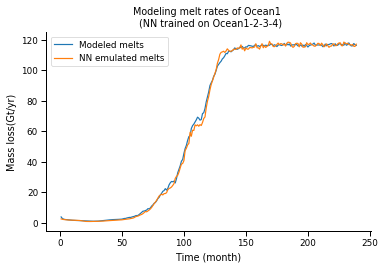

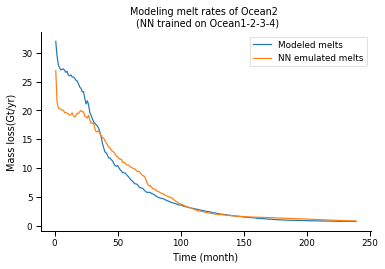

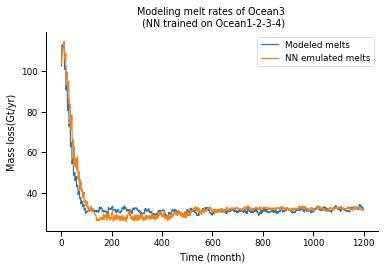

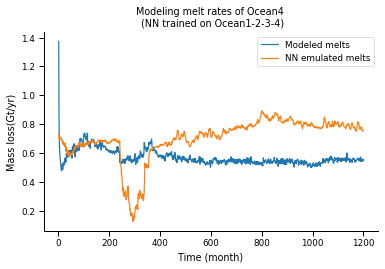

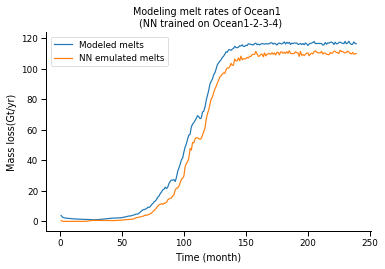

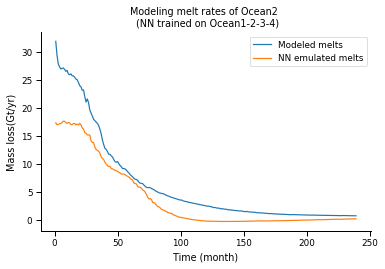

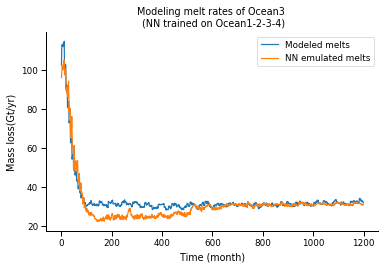

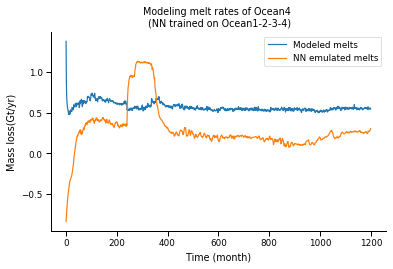

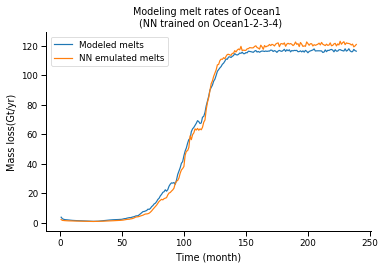

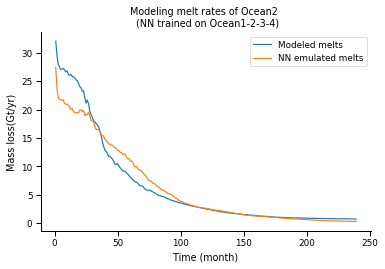

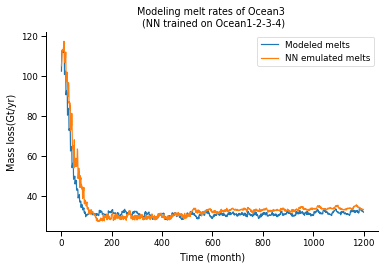

In [ ]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Choix' : 0, 'Ocean' : OcT, 'Epoch' : 8,'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
        , {'Choix' : 1, 'Ocean' : OcT, 'Epoch' : 8, 'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
       ,{'Choix' : 2, 'Ocean' : OcT, 'Epoch' : 8, 'Neur' : '64_64_64_96_96', 'Var' : Var_X_non_position}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
#Titles=['Mean', 'Min' ,'Iqr']
#A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
#    Oc_tar = 'Ocean1', save = True, Title = Titles, sharing = True)
RMSEs = []
for Mod in Mods:
    Cur = []
    for oc in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = 'Ep128_Cutting10%')[0]
        Cur.append(RMSE)
    RMSEs.append(Cur)

In [ ]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

<module 'Scripts.Computing_functions' from '/home/bouissob/Code/Scripts/Computing_functions.py'>

In [47]:
tmx = max(d.date).values
li_pos = []
li_negat = []
yr_to_s = 365*24*3600
for t in range(tmx+1):
    Cur = d.isel(date = t)[['Mod_melt', 'meltRate']].to_dataframe().reset_index()
    Cur['Diff'] = (Cur['Mod_melt'] - Cur['meltRate']) * yr_to_s
    li_pos.append(Cur.loc[Cur.Diff >= 0])
    li_negat.append(Cur.loc[Cur.Diff < 0])
df_pos = pd.concat(li_pos, ignore_index= True).set_index(['date', 'y', 'x']).to_xarray()
df_negat = pd.concat(li_negat, ignore_index= True).set_index(['date', 'y', 'x']).to_xarray()

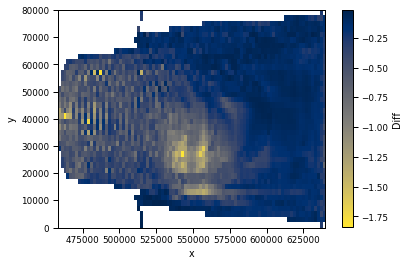

In [62]:
df_pos.Diff.mean(dim = 'date', skipna= True).plot(cmap = 'cividis')

plt.figure()

df_negat.Diff.mean(dim = 'date', skipna= True).plot(cmap = 'cividis_r')

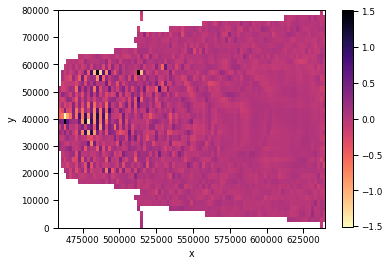

In [63]:
((d.Mod_melt - d.meltRate).mean(dim = 'date', skipna= True) * yr_to_s).plot(cmap = 'magma_r') 

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean1'] : [5.21194657] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean2'] : [1.42562701] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean3'] : [3.42587306] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651236724_Ex_10percent']
['Ocean4'] : [0.13622598] Gt/yr 6_96_96_96_Ch_0-1651236724_Ex_10percent                                     

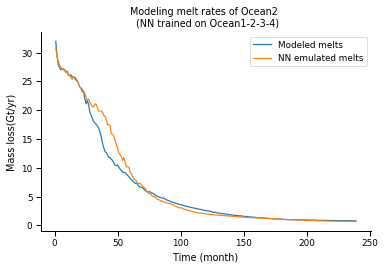

In [7]:
RMSEs = []
Suffix = '_fill100'
for oc in OcT:
    #oc+=Suffix
    RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = True, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Epoch' : 128}, Save_name = 'Ep128_Cutting10%')[0]
    RMSEs.append(RMSE)

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean1'] : [14.46326921] Gt/yr _96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean2'] : [0.2945306] Gt/yr 96_96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean3'] : [0.73434785] Gt/yr 6_96_96_96_Ch_0-1651230990_Ex_                                                   

['/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_']
['Ocean4'] : [0.05800319] Gt/yr 6_96_96_96_Ch_0-1651230990_Ex_                                                   



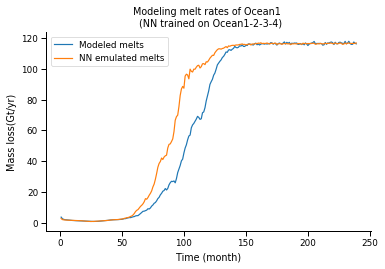

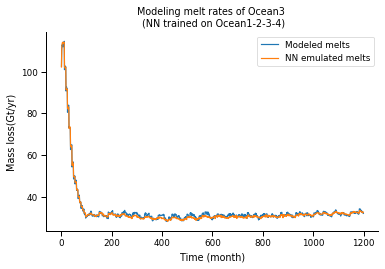

In [8]:
RMSEs = []
Suffix = '_fill100'
for oc in OcT:
    #oc+=Suffix
    RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = oc,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = {'Ocean' : OcT, 
                'Epoch' : 128}, Save_name = 'Ep128_Cutting20%')[0]
    RMSEs.append(RMSE)

In [12]:
Best_Neur = ['32_64_32'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
#Best_Neur = ['96_96_96_96_96'] #, '96_96_96_96_96', '64_64_64_96_96', '32_32_32_64']
Training.training(training_extent = 0, verbose = 1, batch_size = 32, Exact = 1, message = 1,
            Standard_train = Best_Neur, Dataset_train = ['Ocean1'], Epoch = 8, 
            Var_X = Var_X_non_position, Verify = 0, Extra_n = 'Same_ind', 
            Similar_training = 0, Norm_Choix = 0, Method_data = 3, 
            Scaling_lr = False, Frequence_scaling_change = 8, Scaling_change = 5, TensorBoard_logs = True)

Projected training regiment :
 ['32_64_32']
Starting training for neurone : 32_64_32, 0/1 (Previous step : 0.000 s)
Getting dataset : Ocean1
Dataset used : /bettik/bouissob/Method_Data/COM_NEMO-CNRS/Method_3/Ocean1.csv
Check index
Begin Norma
Epoch 1/8
17448/17448 [==============================] - 35s 2ms/step - loss: 0.1942 - mae: 0.2331 - mse: 0.1942 - val_loss: 0.1537 - val_mae: 0.1915 - val_mse: 0.1537
Epoch 2/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1538 - mae: 0.1925 - mse: 0.1538 - val_loss: 0.1359 - val_mae: 0.1866 - val_mse: 0.1359
Epoch 3/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1421 - mae: 0.1864 - mse: 0.1421 - val_loss: 0.1300 - val_mae: 0.1821 - val_mse: 0.1300
Epoch 4/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1295 - mae: 0.1771 - mse: 0.1295 - val_loss: 0.1189 - val_mae: 0.1693 - val_mse: 0.1189
Epoch 5/8
17448/17448 [==============================] - 33s 2ms/step - loss: 0.1191 

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648383533_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649013859_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649013859_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_96_96_96_96_96_Ch_0-1649246729_Ex_Same_ind


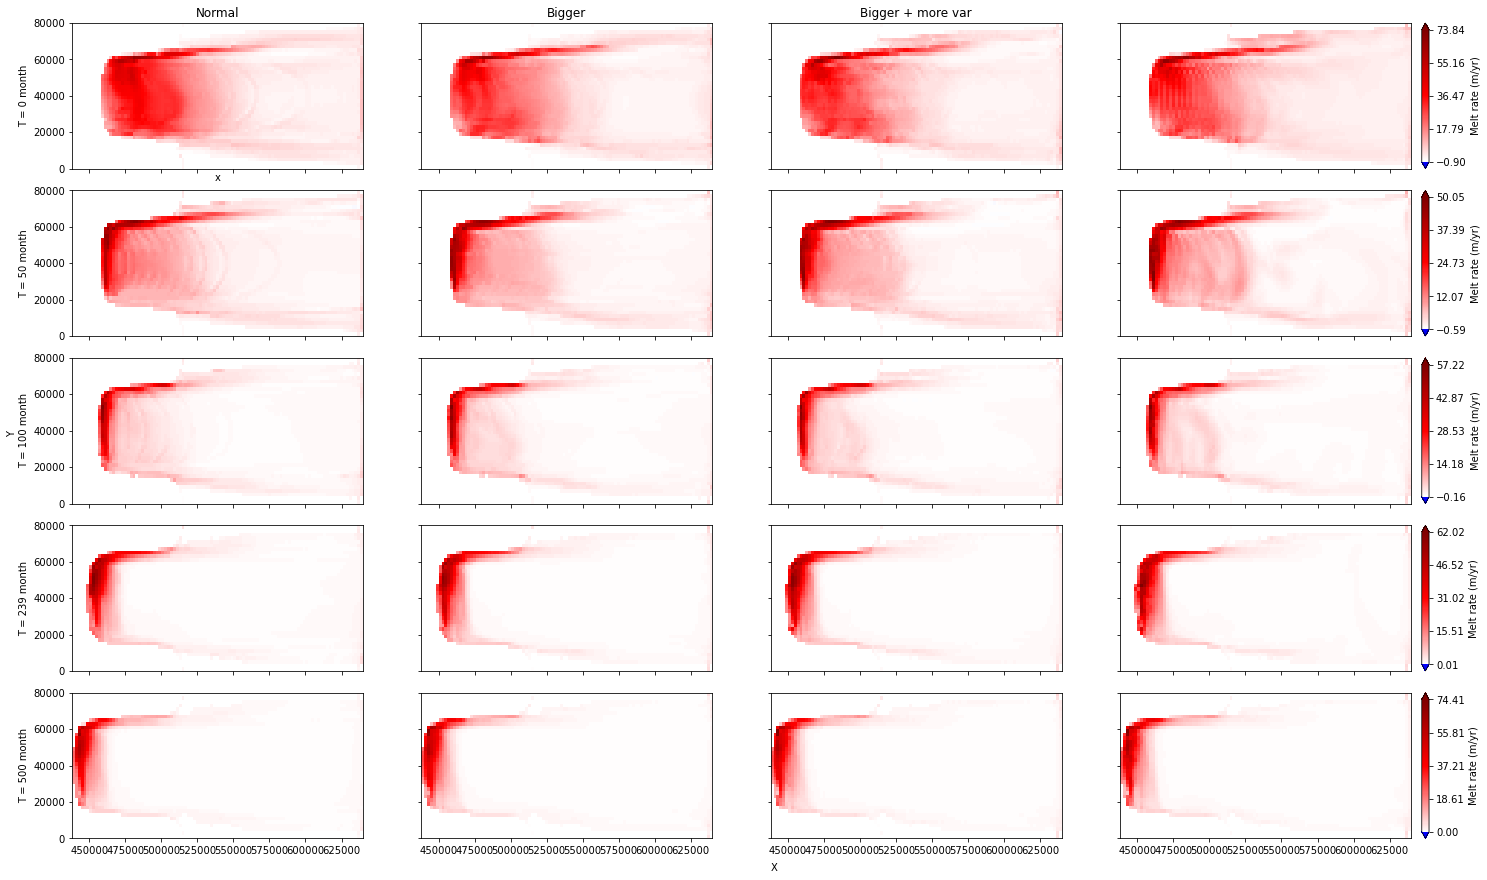

In [25]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 4}
        ,{'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :0, 'Var' : Var_X_BIG},
        {'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :0, 'Var' : Var_X_BIG_Extra}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]

Titles=['Normal', 'Bigger', 'Bigger + more var']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 500], 
                            Oc_tar = 'Ocean3', save = False, Title = Titles, sharing = True)

In [16]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 1}
       ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 2, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 3, 'Extra_n' : 'Same_ind'}
        ,{'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind', 'index' :1}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Small data', 'Big data']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], Oc_tar = 'Ocean1', save = True, Title = Titles)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648203773_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648198308_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648136641_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648131277_Ex_Same_ind
Fin

In [4]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 80, 'Neur' : '96_96_96_96_96', 'Ocean' : OcT, 'Method_data' : 4},
        {'Epoch' : 30, 'Neur' : '96_96_96_96_96', 'Ocean' : OcTPlus,'Method_data' : 4}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['NN trained on OcT', 'NN trained on OcTPlus']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'CPL_EXP13_rst', Type_tar = 'FAVIER_2019' ,save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_96_96_96_96_96_Ch_0-1651230990_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_80_N_96_96_96_96_96_Ch_0-1649604319_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4_CPL_EXP10_rst/Ep_30_N_96_96_96_96_96_Ch_0-1649628838_Ex_


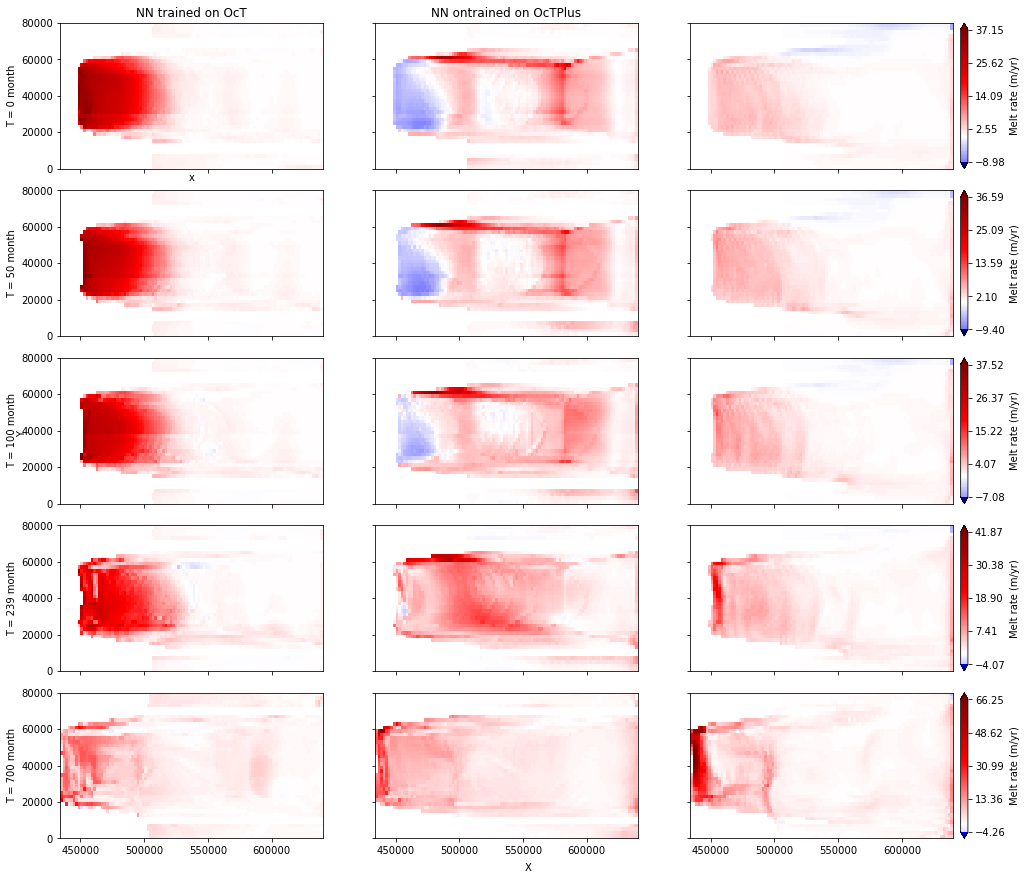

In [15]:
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'CPL_EXP12_rst', Type_tar = 'FAVIER_2019' ,save = True, Title = Titles, sharing = True)

In [33]:
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Neur' : '0', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Method_data' : 3}
        , {'Epoch' : 8, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Extra_n' : 'Same_ind', 'Var' : ['temperatureYZ', 'salinityYZ', 'iceDraft'], 'Method_data' : 3}
       ,{'Epoch' : 30, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'Method_data' : 4, 'Extra_n' : 'Same_ind',
        'Scaling_lr' : True}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Linear NN', 'More neurons' ,'More neurons + new variables + scaling rate']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239], 
    Oc_tar = 'Ocean1', save = True, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1648636427_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_32_32_96_96_Ch_0-1648637104_Ex_Same_ind
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_30_N_32_32_96_96_Ch_0-1648410197_Ex_Same_ind


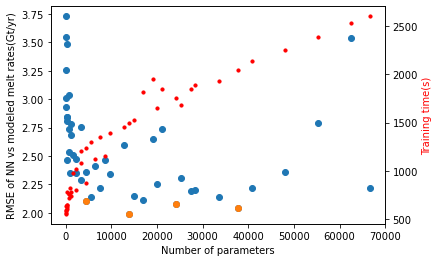

In [18]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
Mod_att = {'Epoch' :8, 'Var' : Var_X_non_position, 
        'Extra_n' : 'Same_ind', 'Ocean' : OcT, 'Choix' : 0}
Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = False, Ocean_target = OcT, message = 0, Time = True
                , NN_attributes = Mod_att, load = True, See_best = True)

In [10]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)

<module 'Scripts.Computing_functions' from '/home/bouissob/Code/Scripts/Computing_functions.py'>

In [11]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
OcT = ['Ocean1','Ocean2','Ocean3','Ocean4' ]
Mods = [{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '64_64_64_96', 'Ocean' : OcT}
       ,{'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '0', 'Ocean' : OcT}
       ]
#    {'Epoch' : 5, 'Var' : Var_X1, 'Exact':1, 'Neur' : '32_64_64_32'},
#       ]
Titles=['Deep NN', 'Linear NN']
A = Plotting.plot_N_side_exp(Trainings.model_NN, Mods, ind = 0, T = [0, 50, 100, 239, 700], 
    Oc_tar = 'Ocean3',save = False, Title = Titles, sharing = True)

Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_Ch_0-1646935614_Ex_
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_64_64_64_96_Ch_0-1646935614_Ex_
Started computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind
Finished computing for /home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_8_N_0_Ch_0-1647892530_Ex_Same_ind
